In [3]:
BASE_FOLDER = '../../../'
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy.signal as sig
from pydub import AudioSegment
%run -i ..\..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation


In [4]:
def load_audio(filepath):
    return librosa.load(os.path.abspath(BASE_FOLDER+filepath), sr=None, mono=False)

In [18]:
def mel_plot(f,nr,title,ini=False):
    plt.subplot(2,4,nr)
    mel_n2 = feature_extractor_mel(BASE_FOLDER,'mel1')
    mel_n2.set_hyperparamter(n_mels=240, n_fft=2048)
    mel_n2.create_from_wav(f)
    mel_n2.plot(colorbar=False)
    plt.xlabel('time frames [sec]')
    plt.ylabel('')
    plt.title(f'MEL spectrum ' + title)
    if ini:
        plt.xlabel('time frames [sec]')
        plt.ylabel('MEL freq [Hz]')
    else:
        ax = plt.gca()
        plt.setp( ax.get_yticklabels(), visible=False)
        
def psd_plot(f,nr,title,ini=False,axm1=None):
    plt.subplot(2,4,nr,sharey=axm1)
    psd_n2 = feature_extractor_welchPSD(BASE_FOLDER,'psd')
    psd_n2.set_hyperparamter(nfft=1024, nperseg=512)
    psd_n2.create_from_wav(f)
    psd_n2.plot(loglog=True)
    plt.xlabel('time frames [sec]')
    plt.ylabel('')
    plt.title(f'Welch spec. ' + title)
    plt.grid()
    if ini:
        plt.xlabel('freq. [Hz]')
        plt.ylabel('power [V^2]')

    else:
        ax = plt.gca()
        plt.setp( ax.get_yticklabels(), visible=False)
    return plt.gca()

def move_wav_mp3(fin,fout):
    AudioSegment.from_wav(fin).normalize().export(fout, format="mp3")

def move_all_wav(fn1,fn2,fa1,fa2,title):
    for i,f in enumerate([fn1,fn2,fa1,fa2]):
        move_wav_mp3(os.path.abspath(BASE_FOLDER+f),
                 '.\\'+title.replace(' ','_')+'\\'+
                     f.replace('\\','_').replace('.wav',f'plt{i}.mp3'))
    

    
def html_section():
    pass

def plot_it(fn1,fn2,fa1,fa2,title, mp3=False):
    fig = plt.figure(figsize=(16,9))
    mel_plot(fn1,1, 'normal 1', True)
    mel_plot(fn2,2, 'normal 2', False)
    mel_plot(fa1,3, 'abnormal 1', False)
    mel_plot(fa2,4, 'abnormal 2', False)

    ax = psd_plot(fn1,5,'normal 1',True)
    ax = psd_plot(fn2,6,'normal 2',False, ax)
    ax = psd_plot(fa1,7,'abnormal 1',False, ax)
    ax = psd_plot(fa2,8,'abnormal 2',False, ax)
    
    
    
   
    plt.tight_layout()
    
    fig.suptitle(title,fontsize=18,y=1.0001)
    plt.subplots_adjust(top=0.94)
    
    os.makedirs(title.replace(' ','_'), exist_ok=True)
    plt.savefig('.\\' + title.replace(' ','_')+ '\\' + title.replace(' ','_') + '.png', transparent=False, dpi=300)
    if mp3:
        move_all_wav(fn1,fn2,fa1,fa2,title)
    
    
    
 


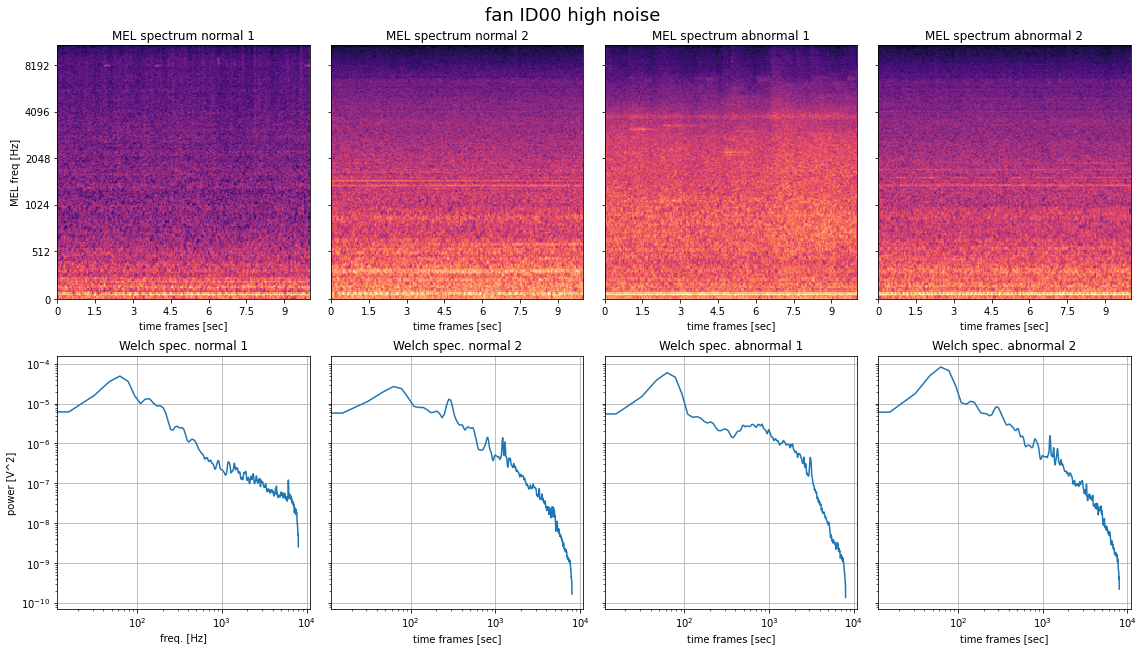

In [19]:
fn1 = r'dataset\min6dB\fan\id_00\normal\00000108.wav'
fa1 = r'dataset\min6dB\fan\id_00\abnormal\00000080.wav'
fn2 = r'dataset\min6dB\fan\id_00\normal\00000355.wav'
fa2 = r'dataset\min6dB\fan\id_00\abnormal\00000105.wav'
plot_it(fn1,fn2,fa1,fa2,'fan ID00 high noise', mp3=True)

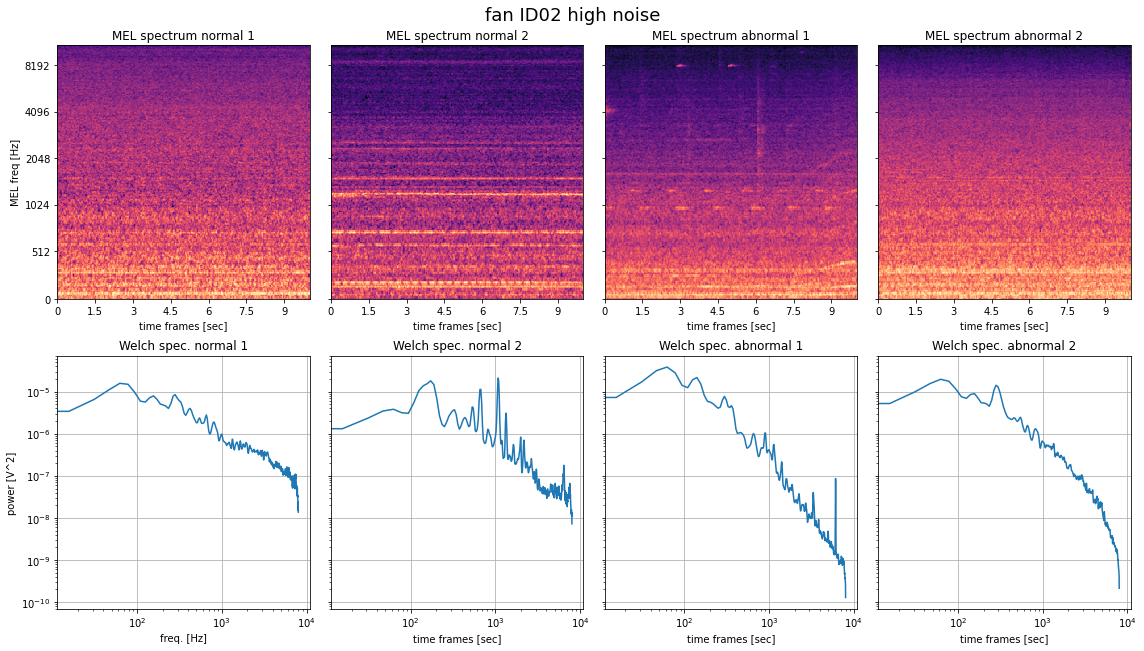

In [14]:
fn1 = r'dataset\min6dB\fan\id_02\normal\00000108.wav'
fa1 = r'dataset\min6dB\fan\id_02\abnormal\00000080.wav'
fn2 = r'dataset\min6dB\fan\id_02\normal\00000355.wav'
fa2 = r'dataset\min6dB\fan\id_02\abnormal\00000105.wav'
plot_it(fn1,fn2,fa1,fa2,'fan ID02 high noise', mp3=True)

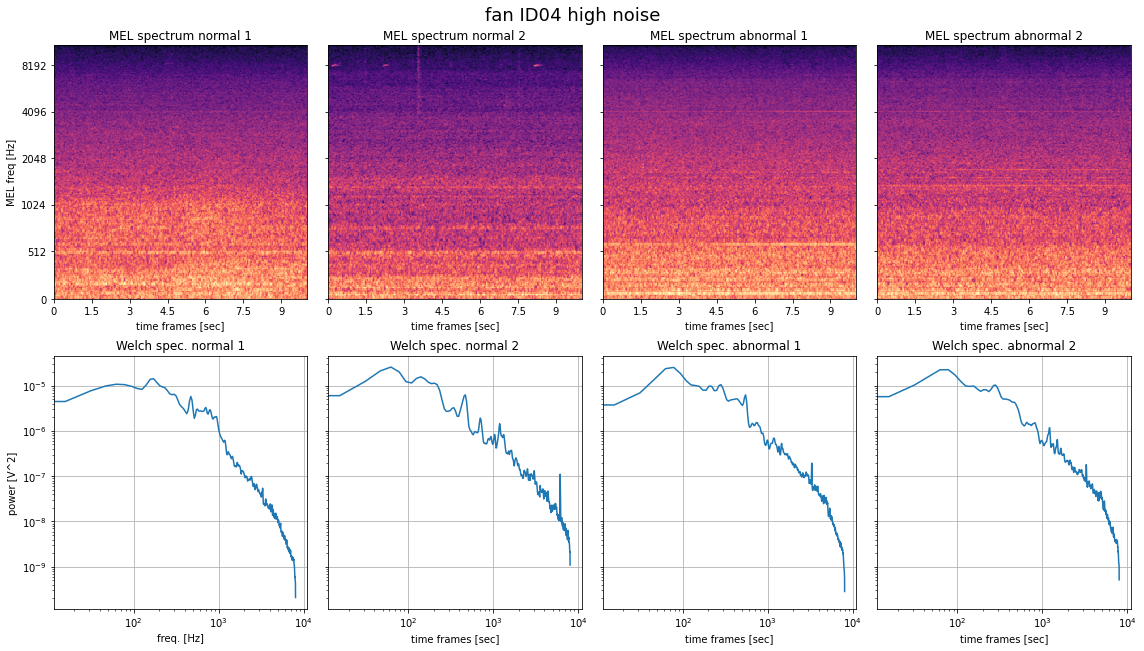

In [15]:
fn1 = r'dataset\min6dB\fan\id_04\normal\00000108.wav'
fa1 = r'dataset\min6dB\fan\id_04\abnormal\00000080.wav'
fn2 = r'dataset\min6dB\fan\id_04\normal\00000355.wav'
fa2 = r'dataset\min6dB\fan\id_04\abnormal\00000105.wav'
plot_it(fn1,fn2,fa1,fa2,'fan ID04 high noise', mp3=True)

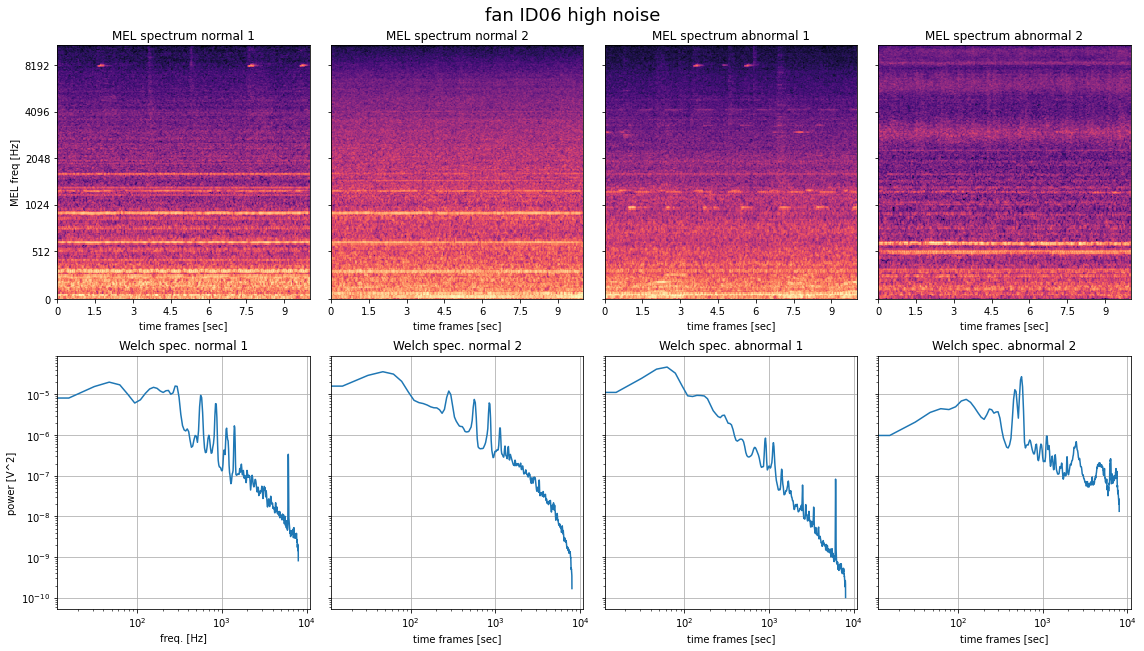

In [16]:
fn1 = r'dataset\min6dB\fan\id_06\normal\00000108.wav'
fa1 = r'dataset\min6dB\fan\id_06\abnormal\00000080.wav'
fn2 = r'dataset\min6dB\fan\id_06\normal\00000355.wav'
fa2 = r'dataset\min6dB\fan\id_06\abnormal\00000105.wav'
plot_it(fn1,fn2,fa1,fa2,'fan ID06 high noise', mp3=True)